# Exploratory Data Analysis
- This file contains code and descriptions of exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import statsmodels.api as sm

pio.templates.default = "plotly_dark"

In [2]:
fangraphs_data = pd.read_csv('../data/fangraphs_player_data.csv')
fangraphs_data

IDfg  Season            Name   Team  Age    G   AB   PA    H   1B  ...  \
0     15640    2024     Aaron Judge    NYY   32  158  559  704  180   85  ...   
1     15640    2022     Aaron Judge    NYY   30  157  570  696  177   87  ...   
2     25764    2024  Bobby Witt Jr.    KCR   24  161  636  709  211  123  ...   
3     13611    2018    Mookie Betts    BOS   25  136  520  614  180   96  ...   
4     10155    2018      Mike Trout    LAA   26  140  471  608  147   80  ...   
...     ...     ...             ...    ...  ...  ...  ...  ...  ...  ...  ...   
4370   3179    2016  Dioner Navarro  - - -   32  101  304  334   63   42  ...   
4371  12155    2024   Eddie Rosario  - - -   32   91  297  319   52   30  ...   
4372   3448    2019     Jeff Mathis    TEX   36   88  228  244   36   25  ...   
4373  11615    2024   Brandon Drury    LAA   31   97  325  360   55   44  ...   
4374   9272    2018     Chris Davis    BAL   32  128  470  522   79   51  ...   

      maxEV  HardHit  HardHit%  Events  CStr%   CSW%  xBA  xSLG  xwOBA  L-WAR  
0     117.5      238     0.609     391  0.146  0.267  NaN   NaN    NaN   11.3  
1     118.4      246     0.609     404  0.169  0.287  NaN   NaN    NaN   11.4  
2     116.9      259     0.481     538  0.138  0.236  NaN   NaN    NaN   10.0  
3     110.6      217     0.500     434  0.220  0.270  NaN   NaN    NaN   10.4  
4     118.0      162     0.460     352  0.201  0.261  NaN   NaN    NaN    9.5  
...     ...      ...       ...     ...    ...    ...  ...   ...    ...    ...  
4370  104.3       52     0.218     238  0.187  0.287  NaN   NaN    NaN   -1.8  
4371  110.2       96     0.425     226  0.146  0.281  NaN   NaN    NaN   -2.3  
4372  105.5       37     0.261     142  0.155  0.322  NaN   NaN    NaN   -2.1  
4373  113.7       87     0.352     247  0.175  0.280  NaN   NaN    NaN   -1.9  
4374  111.8      113     0.401     282  0.174  0.316  NaN   NaN    NaN   -2.6  

[4375 rows x 320 columns]

### Fangraphs Dataset


In [3]:
fangraphs_data.isnull().sum().index

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'G', 'AB', 'PA', 'H', '1B',
       ...
       'maxEV', 'HardHit', 'HardHit%', 'Events', 'CStr%', 'CSW%', 'xBA',
       'xSLG', 'xwOBA', 'L-WAR'],
      dtype='object', length=320)

In [4]:
null_sums = fangraphs_data.isnull().sum()
columns_with_nans_count = null_sums[null_sums > 0]
columns_with_nans_count.keys()

Index(['Fld', 'phLI', 'SF%', 'SFv', 'KN%', 'KNv', 'XX%', 'PO%', 'wSF', 'wKN',
       'wSF/C', 'wKN/C', 'FT% (sc)', 'FS% (sc)', 'FO% (sc)', 'KC% (sc)',
       'EP% (sc)', 'SC% (sc)', 'KN% (sc)', 'UN% (sc)', 'vFT (sc)', 'vFS (sc)',
       'vFO (sc)', 'vKC (sc)', 'vEP (sc)', 'vSC (sc)', 'vKN (sc)', 'FT-X (sc)',
       'FS-X (sc)', 'FO-X (sc)', 'KC-X (sc)', 'EP-X (sc)', 'SC-X (sc)',
       'KN-X (sc)', 'FT-Z (sc)', 'FS-Z (sc)', 'FO-Z (sc)', 'KC-Z (sc)',
       'EP-Z (sc)', 'SC-Z (sc)', 'KN-Z (sc)', 'wFT (sc)', 'wFS (sc)',
       'wFO (sc)', 'wKC (sc)', 'wEP (sc)', 'wSC (sc)', 'wKN (sc)',
       'wFT/C (sc)', 'wFS/C (sc)', 'wFO/C (sc)', 'wKC/C (sc)', 'wEP/C (sc)',
       'wSC/C (sc)', 'wKN/C (sc)', 'UBR', 'wGDP', 'CS% (pi)', 'FS% (pi)',
       'KN% (pi)', 'SB% (pi)', 'XX% (pi)', 'vCS (pi)', 'vFS (pi)', 'vKN (pi)',
       'vSB (pi)', 'vXX (pi)', 'CS-X (pi)', 'FS-X (pi)', 'KN-X (pi)',
       'SB-X (pi)', 'XX-X (pi)', 'CS-Z (pi)', 'FS-Z (pi)', 'KN-Z (pi)',
       'SB-Z (pi)', 'XX-Z (pi)', 'wCS

In [5]:
#dropping columns where at least 80% of the values are nan
fangraphs_data = fangraphs_data.drop((columns_with_nans_count.apply(lambda row: row/len(fangraphs_data)) > 0.8).index, axis = 1)

#filling other columns with the median value of the column
fangraphs_data = fangraphs_data.fillna(fangraphs_data.median)
fangraphs_data

IDfg  Season            Name   Team  Age    G   AB   PA    H   1B  ...  \
0     15640    2024     Aaron Judge    NYY   32  158  559  704  180   85  ...   
1     15640    2022     Aaron Judge    NYY   30  157  570  696  177   87  ...   
2     25764    2024  Bobby Witt Jr.    KCR   24  161  636  709  211  123  ...   
3     13611    2018    Mookie Betts    BOS   25  136  520  614  180   96  ...   
4     10155    2018      Mike Trout    LAA   26  140  471  608  147   80  ...   
...     ...     ...             ...    ...  ...  ...  ...  ...  ...  ...  ...   
4370   3179    2016  Dioner Navarro  - - -   32  101  304  334   63   42  ...   
4371  12155    2024   Eddie Rosario  - - -   32   91  297  319   52   30  ...   
4372   3448    2019     Jeff Mathis    TEX   36   88  228  244   36   25  ...   
4373  11615    2024   Brandon Drury    LAA   31   97  325  360   55   44  ...   
4374   9272    2018     Chris Davis    BAL   32  128  470  522   79   51  ...   

        LA  Barrels  Barrel%  maxEV  HardHit  HardHit%  Events  CStr%   CSW%  \
0     18.9      105    0.269  117.5      238     0.609     391  0.146  0.267   
1     14.9      106    0.262  118.4      246     0.609     404  0.169  0.287   
2     15.1       77    0.143  116.9      259     0.481     538  0.138  0.236   
3     18.5       57    0.131  110.6      217     0.500     434  0.220  0.270   
4     18.6       54    0.153  118.0      162     0.460     352  0.201  0.261   
...    ...      ...      ...    ...      ...       ...     ...    ...    ...   
4370  16.9        2    0.008  104.3       52     0.218     238  0.187  0.287   
4371  14.3       12    0.053  110.2       96     0.425     226  0.146  0.281   
4372  16.9        1    0.007  105.5       37     0.261     142  0.155  0.322   
4373   6.0        9    0.036  113.7       87     0.352     247  0.175  0.280   
4374  15.1       27    0.096  111.8      113     0.401     282  0.174  0.316   

      L-WAR  
0      11.3  
1      11.4  
2      10.0  
3      10.4  
4       9.5  
...     ...  
4370   -1.8  
4371   -2.3  
4372   -2.1  
4373   -1.9  
4374   -2.6  

[4375 rows x 229 columns]

In [6]:
sorted(fangraphs_data['Season'].unique())

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

The features that were chosen for analysis are:
- EV: average exit veloxity 
- Hard Hit %: percentage of batted balls w/ exit velocity >95mph
- BB%: Walks/Plate Appearance
- K%: Strike out/Plate Appearance
- ISO: SLG - AVG, isolated power
- O-Swing%: Percentage of pitches outside of the zone a player swings at
- Z-Swing%: Percentage of pitches inside of the zone a player swings at
- O-Contact%: Percentage of times a batter makes contact with the ball when swinging at pitches outside the zone
- Z-Contact%: Percentage of times a batter makes contact with the ball when swinging at pitches inside the zone
- SwStr%: Percentage of pitches thrown that result in a batter swinging and missing
- CStr%: Percentage of pitches that are called strikes without the batter swinging 
- maxEV: Highest exit velocity by the batter recorded in a season
- Barrel%: Percent of batted balls that are counted as barrels 
- FB%: Percentage of balls put in play that result in a fly ball
- GB%: Percentage of balls put in play that result in a ground ball
- AVG: Batting average
- wRC+: Weighted Runs Created adjusted for league and ballpark factors
- LA: average angle that a ball flies off the player's bat

In a future project, I would like to use methods such as PCA for feature selection, but for this project, I will mainly be looking at these select features.

In [7]:
fg_select_data = fangraphs_data[['Name', 'IDfg','Season', 'AVG','ISO', 'wRC+','BB%', 'K%', \
                'Barrel%', 'HardHit%', 'EV', 'maxEV', 'LA', 'GB%', 'FB%','SwStr%', 'CStr%', \
                'O-Swing%', 'Z-Swing%', 'O-Contact%', 'Z-Contact%']]
wrc_col = fg_select_data.pop('wRC+')
fg_select_data.insert(len(fg_select_data.columns), 'wRC+', wrc_col)
fg_select_data = fg_select_data.sort_values(by = ['Name', 'Season'], ascending=[True, False])

fg_select_data['wRC+_next'] = fg_select_data.groupby('Name').shift(1)['wRC+']
fg_select_data.dropna(inplace=True)
fg_select_data

Name   IDfg  Season    AVG    ISO    BB%     K%  Barrel%  \
3315       A.J. Ellis   5677    2017  0.210  0.161  0.074  0.178    0.034   
3609       A.J. Ellis   5677    2016  0.216  0.082  0.097  0.158    0.028   
2575       A.J. Ellis   5677    2015  0.238  0.166  0.147  0.175    0.055   
2112  A.J. Pierzynski    746    2015  0.300  0.130  0.044  0.085    0.029   
2629     A.J. Pollock   9256    2022  0.245  0.143  0.061  0.186    0.094   
...               ...    ...     ...    ...    ...    ...    ...      ...   
309       Zack Cozart   2616    2017  0.297  0.251  0.122  0.154    0.044   
2338      Zack Cozart   2616    2016  0.252  0.172  0.073  0.165    0.023   
1727      Zack Cozart   2616    2015  0.258  0.201  0.065  0.136    0.018   
776        Zack Gelof  29766    2023  0.267  0.237  0.087  0.273    0.111   
4181       Zack Short  19562    2021  0.141  0.141  0.120  0.321    0.049   

      HardHit%    EV  ...    GB%    FB%  SwStr%  CStr%  O-Swing%  Z-Swing%  \
3315     0.310  86.0  ...  0.495  0.369   0.075  0.211     0.211     0.622   
3609     0.333  86.9  ...  0.414  0.364   0.046  0.217     0.179     0.594   
2575     0.329  87.7  ...  0.437  0.352   0.054  0.231     0.142     0.570   
2112     0.255  85.4  ...  0.466  0.287   0.071  0.108     0.403     0.757   
2629     0.420  88.8  ...  0.452  0.358   0.118  0.128     0.379     0.761   
...        ...   ...  ...    ...    ...     ...    ...       ...       ...   
309      0.288  85.8  ...  0.382  0.423   0.060  0.204     0.244     0.604   
2338     0.278  86.2  ...  0.394  0.399   0.079  0.179     0.289     0.664   
1727     0.231  85.9  ...  0.386  0.422   0.067  0.179     0.315     0.658   
776      0.407  89.8  ...  0.410  0.335   0.161  0.142     0.325     0.735   
4181     0.330  87.5  ...  0.272  0.563   0.105  0.200     0.228     0.660   

      O-Contact%  Z-Contact%  wRC+  wRC+_next  
3315       0.667       0.873    82      105.0  
3609       0.743       0.920    64       82.0  
2575       0.682       0.889   116       64.0  
2112       0.806       0.920   111       41.0  
2629       0.636       0.882    92       45.0  
...          ...         ...   ...        ...  
309        0.712       0.922   139       81.0  
2338       0.651       0.916    90      139.0  
1727       0.738       0.925   106       90.0  
776        0.563       0.747   132       82.0  
4181       0.583       0.823    42       77.0  

[3202 rows x 22 columns]

In [8]:
numeric_cols = fg_select_data.select_dtypes(include = ['number']).columns

#has the season column
numeric_data = fg_select_data[numeric_cols[2:]]
numeric_data

AVG    ISO    BB%     K%  Barrel%  HardHit%    EV  maxEV    LA    GB%  \
3315  0.210  0.161  0.074  0.178    0.034     0.310  86.0  106.4  11.5  0.495   
3609  0.216  0.082  0.097  0.158    0.028     0.333  86.9  105.5  14.6  0.414   
2575  0.238  0.166  0.147  0.175    0.055     0.329  87.7  108.5   9.8  0.437   
2112  0.300  0.130  0.044  0.085    0.029     0.255  85.4  110.0  10.6  0.466   
2629  0.245  0.143  0.061  0.186    0.094     0.420  88.8  110.8  11.8  0.452   
...     ...    ...    ...    ...      ...       ...   ...    ...   ...    ...   
309   0.297  0.251  0.122  0.154    0.044     0.288  85.8  108.3  14.8  0.382   
2338  0.252  0.172  0.073  0.165    0.023     0.278  86.2  105.6  15.5  0.394   
1727  0.258  0.201  0.065  0.136    0.018     0.231  85.9  102.8  17.0  0.386   
776   0.267  0.237  0.087  0.273    0.111     0.407  89.8  108.5  11.8  0.410   
4181  0.141  0.141  0.120  0.321    0.049     0.330  87.5  108.2  24.3  0.272   

        FB%  SwStr%  CStr%  O-Swing%  Z-Swing%  O-Contact%  Z-Contact%  wRC+  \
3315  0.369   0.075  0.211     0.211     0.622       0.667       0.873    82   
3609  0.364   0.046  0.217     0.179     0.594       0.743       0.920    64   
2575  0.352   0.054  0.231     0.142     0.570       0.682       0.889   116   
2112  0.287   0.071  0.108     0.403     0.757       0.806       0.920   111   
2629  0.358   0.118  0.128     0.379     0.761       0.636       0.882    92   
...     ...     ...    ...       ...       ...         ...         ...   ...   
309   0.423   0.060  0.204     0.244     0.604       0.712       0.922   139   
2338  0.399   0.079  0.179     0.289     0.664       0.651       0.916    90   
1727  0.422   0.067  0.179     0.315     0.658       0.738       0.925   106   
776   0.335   0.161  0.142     0.325     0.735       0.563       0.747   132   
4181  0.563   0.105  0.200     0.228     0.660       0.583       0.823    42   

      wRC+_next  
3315      105.0  
3609       82.0  
2575       64.0  
2112       41.0  
2629       45.0  
...         ...  
309        81.0  
2338      139.0  
1727       90.0  
776        82.0  
4181       77.0  

[3202 rows x 19 columns]

In [9]:
corr_heatmap = px.imshow(numeric_data.corr(), text_auto=True)
corr_heatmap.update_layout(width=800, height=800)

In [10]:
target_column = "wRC+_next"

correlations = numeric_data.corrwith(numeric_data[target_column])
correlations.drop('wRC+_next')

AVG           0.214384
ISO           0.344744
BB%           0.245435
K%           -0.064739
Barrel%       0.335552
HardHit%      0.354394
EV            0.370509
maxEV         0.312875
LA            0.106280
GB%          -0.126907
FB%           0.121901
SwStr%       -0.047719
CStr%        -0.064431
O-Swing%     -0.121845
Z-Swing%      0.047279
O-Contact%    0.024954
Z-Contact%   -0.006901
wRC+          0.391822
dtype: float64

- As seen above, many of the variables don't have a linear relationship with wRC+ next year, which means we are going to need to use a model that can take into account more than linear relationships.

In [11]:
numeric_data.describe()

AVG          ISO          BB%           K%      Barrel%  \
count  3202.000000  3202.000000  3202.000000  3202.000000  3202.000000   
mean      0.252349     0.167892     0.085265     0.218951     0.069566   
std       0.034952     0.060370     0.031879     0.062411     0.041561   
min       0.117000     0.010000     0.008000     0.039000     0.000000   
25%       0.231000     0.126000     0.062000     0.174000     0.038000   
50%       0.254000     0.165000     0.083000     0.217000     0.064000   
75%       0.275000     0.207000     0.105000     0.259000     0.095000   
max       0.373000     0.422000     0.232000     0.483000     0.275000   

          HardHit%           EV        maxEV           LA          GB%  \
count  3202.000000  3202.000000  3202.000000  3202.000000  3202.000000   
mean      0.368037    88.552124   110.292442    12.474204     0.430862   
std       0.081191     2.264811     3.264215     4.681059     0.070035   
min       0.073000    79.800000    97.700000    -7.900000     0.195000   
25%       0.317000    87.100000   108.200000     9.300000     0.382000   
50%       0.373000    88.600000   110.200000    12.500000     0.429000   
75%       0.424000    90.000000   112.500000    15.600000     0.479000   
max       0.642000    97.600000   122.400000    29.700000     0.674000   

               FB%       SwStr%        CStr%     O-Swing%     Z-Swing%  \
count  3202.000000  3202.000000  3202.000000  3202.000000  3202.000000   
mean      0.360879     0.107172     0.164995     0.310774     0.682975   
std       0.071268     0.033317     0.031277     0.061051     0.059799   
min       0.113000     0.025000     0.075000     0.142000     0.463000   
25%       0.312000     0.083000     0.144000     0.268000     0.643000   
50%       0.362000     0.106000     0.164000     0.308000     0.683000   
75%       0.409000     0.128000     0.186000     0.350000     0.724000   
max       0.649000     0.256000     0.284000     0.540000     0.858000   

        O-Contact%   Z-Contact%         wRC+    wRC+_next  
count  3202.000000  3202.000000  3202.000000  3202.000000  
mean      0.633113     0.857365   100.484072    97.173017  
std       0.089655     0.050885    27.709012    28.684901  
min       0.303000     0.600000    -5.000000   -18.000000  
25%       0.576000     0.824000    83.000000    79.000000  
50%       0.635000     0.863000   101.000000    97.000000  
75%       0.694000     0.894000   118.000000   115.000000  
max       0.914000     0.986000   216.000000   218.000000

## Univariate Data Analysis

In [12]:
def plot_histograms(df: pd.DataFrame) -> None:    
    fig = make_subplots(
        rows=len(df.columns),
        cols=1,
        subplot_titles=[f"Histogram for {col}" for col in df.columns]
    )

    for i, column in enumerate(df.columns):
        fig.add_trace(
            go.Histogram(x=df[column], name=column),
            row=i+1,
            col=1
        )

        fig.add_vline(x = df[column].mean(),
                    row=i+1, col=1, line_dash="dash",
                    annotation_text="Mean",
                    annotation_position="top right")

    fig.update_layout(height=400*len(df.columns), title_text="Histograms for All Columns")
    fig.show()


In [13]:
numeric_data.insert(0, 'Season', fg_select_data['Season'].loc[numeric_data.index])
numeric_data.to_csv('../data/fangraphs_numeric_data_with_outliers', index=False)


In [14]:
numeric_data = numeric_data.iloc[:,1:]
plot_histograms(numeric_data)

In [15]:
#Removing outliers
def remove_outliers(col: pd.Series) -> pd.Series:
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)

    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    return col[(lower < col) & (col < upper)] 

numeric_data_no_outliers = numeric_data.apply(remove_outliers).dropna()
numeric_data_no_outliers

AVG    ISO    BB%     K%  Barrel%  HardHit%    EV  maxEV    LA    GB%  \
11    0.297  0.271  0.103  0.187    0.114     0.465  92.5  113.6  10.4  0.448   
15    0.305  0.324  0.144  0.164    0.126     0.456  91.1  110.6  17.9  0.315   
16    0.286  0.246  0.136  0.121    0.074     0.398  89.4  107.6  16.8  0.346   
18    0.331  0.235  0.099  0.166    0.111     0.418  90.0  110.6  15.2  0.353   
19    0.277  0.242  0.094  0.144    0.091     0.405  90.6  114.5  14.7  0.388   
...     ...    ...    ...    ...      ...       ...   ...    ...   ...    ...   
4360  0.234  0.163  0.070  0.247    0.063     0.375  89.6  118.5  12.5  0.433   
4363  0.241  0.145  0.058  0.146    0.048     0.391  88.7  112.2  13.5  0.435   
4366  0.211  0.074  0.088  0.134    0.016     0.176  84.9  104.3  10.1  0.442   
4369  0.245  0.120  0.064  0.107    0.030     0.332  87.7  108.9  15.0  0.403   
4374  0.168  0.128  0.079  0.368    0.096     0.401  89.3  111.8  15.1  0.396   

        FB%  SwStr%  CStr%  O-Swing%  Z-Swing%  O-Contact%  Z-Contact%   wRC+  \
11    0.379   0.110  0.145     0.251     0.707       0.602       0.828  154.0   
15    0.424   0.097  0.149     0.268     0.704       0.695       0.830  161.0   
16    0.434   0.043  0.209     0.200     0.605       0.791       0.928  157.0   
18    0.370   0.094  0.114     0.301     0.792       0.688       0.880  162.0   
19    0.396   0.075  0.159     0.327     0.679       0.745       0.909  132.0   
...     ...     ...    ...       ...       ...         ...         ...    ...   
4360  0.406   0.138  0.154     0.344     0.708       0.597       0.808   79.0   
4363  0.381   0.088  0.180     0.339     0.644       0.676       0.905   77.0   
4366  0.335   0.048  0.217     0.237     0.601       0.753       0.939   59.0   
4369  0.387   0.060  0.163     0.336     0.678       0.815       0.913   77.0   
4374  0.393   0.142  0.174     0.299     0.650       0.523       0.783   46.0   

      wRC+_next  
11        157.0  
15        112.0  
16        167.0  
18        137.0  
19        118.0  
...         ...  
4360      107.0  
4363       88.0  
4366       99.0  
4369      120.0  
4374       58.0  

[2813 rows x 19 columns]

In [16]:
plot_histograms(numeric_data_no_outliers)

In [17]:
numeric_data_no_outliers.columns

Index(['AVG', 'ISO', 'BB%', 'K%', 'Barrel%', 'HardHit%', 'EV', 'maxEV', 'LA',
       'GB%', 'FB%', 'SwStr%', 'CStr%', 'O-Swing%', 'Z-Swing%', 'O-Contact%',
       'Z-Contact%', 'wRC+', 'wRC+_next'],
      dtype='object')

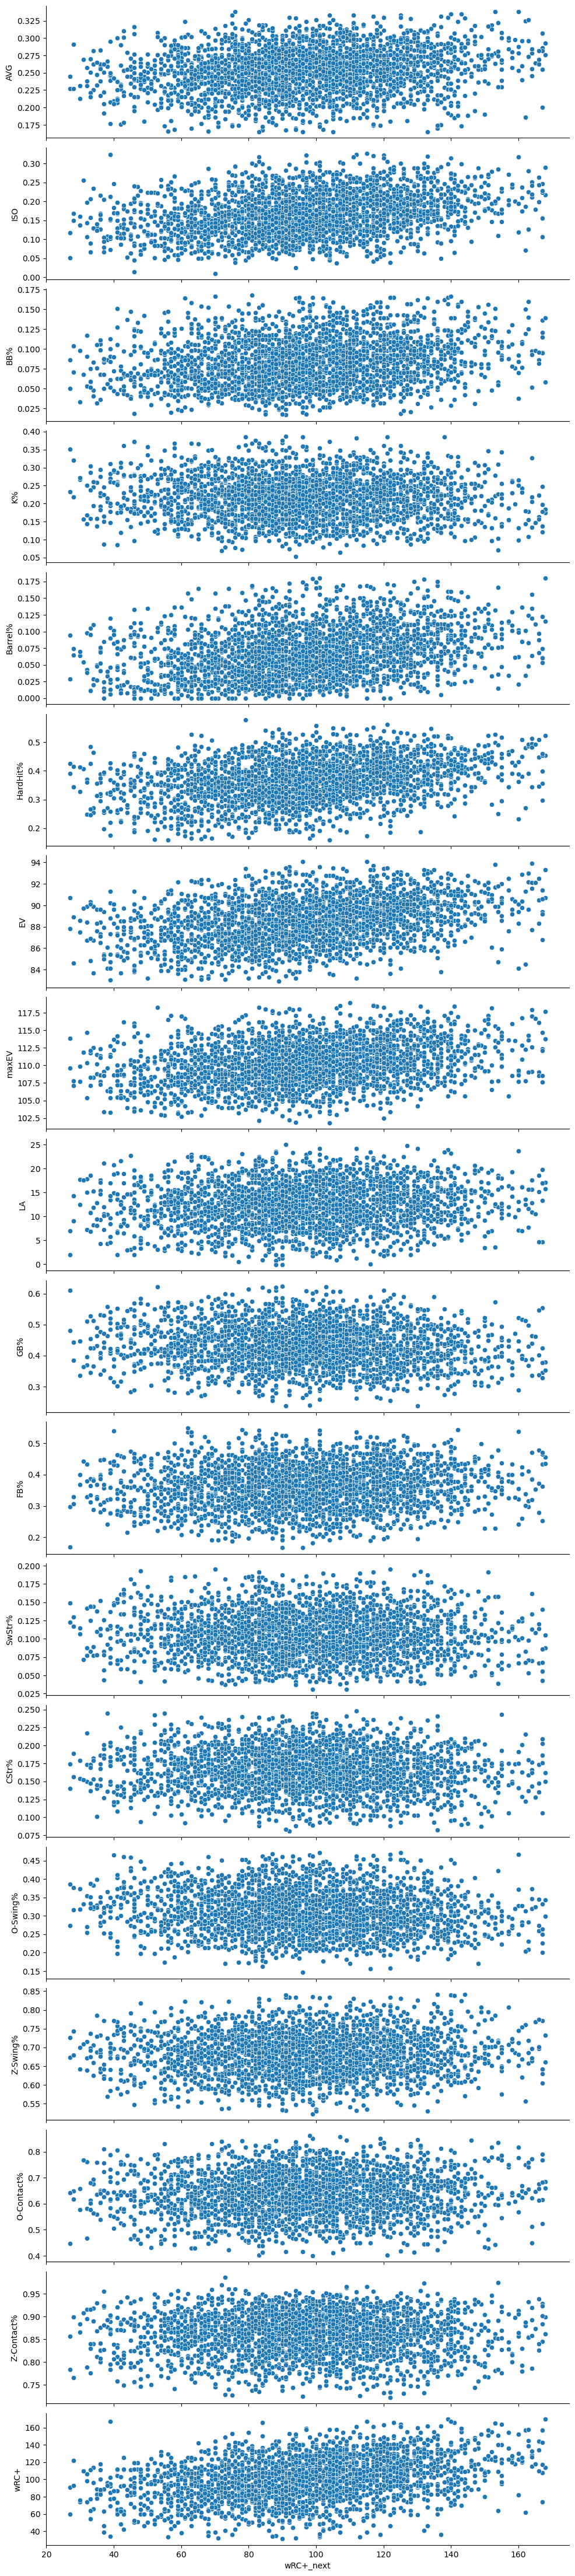

In [18]:
sns.pairplot(numeric_data_no_outliers, 
             y_vars=numeric_data_no_outliers.iloc[:,:-1].columns, 
             x_vars = numeric_data_no_outliers.iloc[:,-1].name,
             aspect=4)

In [19]:
target_column = "wRC+_next"

correlations = numeric_data_no_outliers.corrwith(numeric_data_no_outliers[target_column])
correlations.drop('wRC+_next')

AVG           0.182905
ISO           0.302439
BB%           0.189650
K%           -0.058926
Barrel%       0.294568
HardHit%      0.329685
EV            0.334610
maxEV         0.286089
LA            0.089738
GB%          -0.103727
FB%           0.102875
SwStr%       -0.039967
CStr%        -0.051330
O-Swing%     -0.094035
Z-Swing%      0.045339
O-Contact%    0.039936
Z-Contact%   -0.011523
wRC+          0.352969
dtype: float64

In [20]:
X = numeric_data_no_outliers.iloc[:, :-1]
y = numeric_data_no_outliers.iloc[:, :1]

X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AVG   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.141e+26
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:01:57   Log-Likelihood:                 85610.
No. Observations:                2813   AIC:                        -1.712e+05
Df Residuals:                    2794   BIC:                        -1.711e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.492e-14   4.91e-14      0.711      0.4

- Colinearity may exist due to the fact that ISO and AVG and linearly dependent of each other.

In [21]:
numeric_data_no_outliers.insert(0, 'Season', fg_select_data['Season'].loc[numeric_data_no_outliers.index])
numeric_data_no_outliers

Season    AVG    ISO    BB%     K%  Barrel%  HardHit%    EV  maxEV  \
11      2015  0.297  0.271  0.103  0.187    0.114     0.465  92.5  113.6   
15      2019  0.305  0.324  0.144  0.164    0.126     0.456  91.1  110.6   
16      2018  0.286  0.246  0.136  0.121    0.074     0.398  89.4  107.6   
18      2023  0.331  0.235  0.099  0.166    0.111     0.418  90.0  110.6   
19      2018  0.277  0.242  0.094  0.144    0.091     0.405  90.6  114.5   
...      ...    ...    ...    ...    ...      ...       ...   ...    ...   
4360    2017  0.234  0.163  0.070  0.247    0.063     0.375  89.6  118.5   
4363    2017  0.241  0.145  0.058  0.146    0.048     0.391  88.7  112.2   
4366    2015  0.211  0.074  0.088  0.134    0.016     0.176  84.9  104.3   
4369    2015  0.245  0.120  0.064  0.107    0.030     0.332  87.7  108.9   
4374    2018  0.168  0.128  0.079  0.368    0.096     0.401  89.3  111.8   

        LA    GB%    FB%  SwStr%  CStr%  O-Swing%  Z-Swing%  O-Contact%  \
11    10.4  0.448  0.379   0.110  0.145     0.251     0.707       0.602   
15    17.9  0.315  0.424   0.097  0.149     0.268     0.704       0.695   
16    16.8  0.346  0.434   0.043  0.209     0.200     0.605       0.791   
18    15.2  0.353  0.370   0.094  0.114     0.301     0.792       0.688   
19    14.7  0.388  0.396   0.075  0.159     0.327     0.679       0.745   
...    ...    ...    ...     ...    ...       ...       ...         ...   
4360  12.5  0.433  0.406   0.138  0.154     0.344     0.708       0.597   
4363  13.5  0.435  0.381   0.088  0.180     0.339     0.644       0.676   
4366  10.1  0.442  0.335   0.048  0.217     0.237     0.601       0.753   
4369  15.0  0.403  0.387   0.060  0.163     0.336     0.678       0.815   
4374  15.1  0.396  0.393   0.142  0.174     0.299     0.650       0.523   

      Z-Contact%   wRC+  wRC+_next  
11         0.828  154.0      157.0  
15         0.830  161.0      112.0  
16         0.928  157.0      167.0  
18         0.880  162.0      137.0  
19         0.909  132.0      118.0  
...          ...    ...        ...  
4360       0.808   79.0      107.0  
4363       0.905   77.0       88.0  
4366       0.939   59.0       99.0  
4369       0.913   77.0      120.0  
4374       0.783   46.0       58.0  

[2813 rows x 20 columns]

In [22]:
numeric_data_no_outliers.to_csv('../data/fangraphs_numeric_data_simplified_cleaned', index = False)